<a href="https://colab.research.google.com/github/Tania526-sudo/Image-Deblurring/blob/main/notebooks/Deblur_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
from glob import glob
from PIL import Image
import numpy as np
import torch
import torchvision.transforms as T
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

In [4]:
# --- Preprocessing functions ---

def preprocess(image):
    transform = T.Compose([T.ToTensor()])
    return transform(image).unsqueeze(0)

In [5]:
# --- Post-processing functions ---

def postprocess(tensor):
    img = tensor.squeeze(0).cpu().clamp(0, 1).numpy()
    img = np.transpose(img, (1, 2, 0)) * 255
    return img.astype(np.uint8)

In [10]:
# --- Loading the model ---

from MPRNet import MPRNet
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



checkpoint = torch.load("model_deblurring.pth", map_location=device)
model.load_state_dict(checkpoint['state_dict'])
model.to(device).eval()

MPRNet(
  (shallow_feat1): Sequential(
    (0): Conv2d(3, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): CAB(
      (CA): CALayer(
        (avg_pool): AdaptiveAvgPool2d(output_size=1)
        (conv_du): Sequential(
          (0): Conv2d(96, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): ReLU(inplace=True)
          (2): Conv2d(24, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (3): Sigmoid()
        )
      )
      (body): Sequential(
        (0): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): PReLU(num_parameters=1)
        (2): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
    )
  )
  (shallow_feat2): Sequential(
    (0): Conv2d(3, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): CAB(
      (CA): CALayer(
        (avg_pool): AdaptiveAvgPool2d(output_size=1)
        (conv_du): Sequential(
          (0): Conv2d(96, 

In [11]:
# --- Paths to test image folders ---

blur_dir = 'dataset/blurred'
sharp_dir = 'dataset/sharp'

blur_images = sorted(glob(os.path.join(blur_dir, '*')))
sharp_images = sorted(glob(os.path.join(sharp_dir, '*')))

psnr_list = []
ssim_list = []

In [14]:
print(sharp_np.shape)
print(output_img.shape)

(720, 1280, 3)
(720, 1280, 3)


GOPR0372_07_00-000047.png -> PSNR: 51.23, SSIM: 0.9976


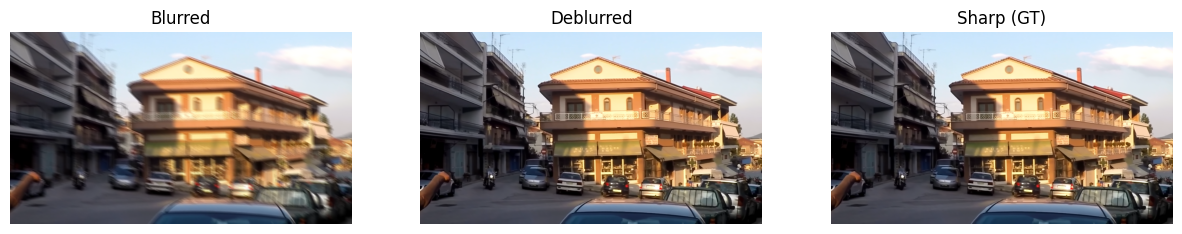

In [15]:
for blur_path, sharp_path in zip(blur_images, sharp_images):
    blur_img = Image.open(blur_path).convert('RGB')
    sharp_img = Image.open(sharp_path).convert('RGB')

    # Model inference
    input_tensor = preprocess(blur_img).to(device)
    with torch.no_grad():
        output_tensor = model(input_tensor)[0]
    output_img = postprocess(output_tensor)

    sharp_np = np.array(sharp_img)

    # Metrics calculation
    current_psnr = psnr(sharp_np, output_img, data_range=255)
    current_ssim = ssim(sharp_np, output_img, channel_axis=2, data_range=255)


    psnr_list.append(current_psnr)
    ssim_list.append(current_ssim)

    # Output results for each file
    print(f"{os.path.basename(blur_path)} -> PSNR: {current_psnr:.2f}, SSIM: {current_ssim:.4f}")

    # Visualization (optional)
    fig, axs = plt.subplots(1, 3, figsize=(15,5))
    axs[0].imshow(blur_img); axs[0].set_title('Blurred'); axs[0].axis('off')
    axs[1].imshow(output_img); axs[1].set_title('Deblurred'); axs[1].axis('off')
    axs[2].imshow(sharp_img); axs[2].set_title('Sharp (GT)'); axs[2].axis('off')
    plt.show()


In [16]:
print(f"Average PSNR: {np.mean(psnr_list):.2f}")
print(f"Average SSIM: {np.mean(ssim_list):.4f}")

Average PSNR: 51.23
Average SSIM: 0.9976
